In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py
import os

In [6]:
from circles import (
    make_complex_circle, 
    make_simple_circle, 
    make_complex_dataset, 
    make_simple_dataset,
    run_multiprocess,
    structure_data
)

In [7]:
DEFAULT_CMAP = "grey"
mpl.rc('image', cmap=DEFAULT_CMAP)
IMG_SIZE = IMG_SIZE

Shape and number of positive pixels (128, 128), 1218


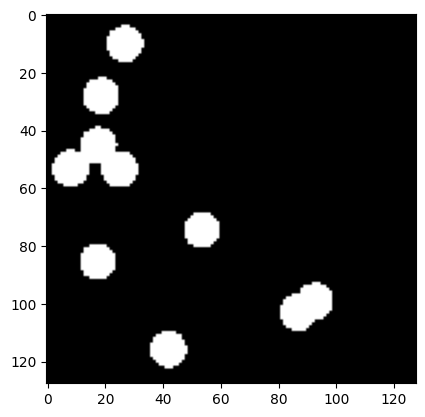

In [24]:
circle_map = make_simple_circle()
print(f"Shape and number of positive pixels {circle_map.shape}, {circle_map.sum()}")
_ = plt.imshow(circle_map)

100%|██████████| 50/50 [00:33<00:00,  1.51it/s]

Shape and number of positive pixels (50, 128, 128, 1), 62833
Target shape (50, 1)


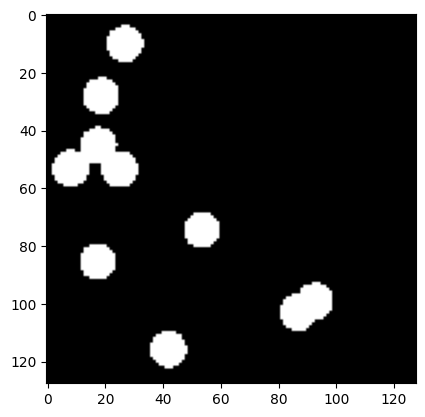

In [27]:
min_n_circles = 1
max_n_circles = 20
images, target = make_simple_dataset(50, 
                                     min_n_circles,
                                     max_n_circles,
                                     IMG_SIZE
                                     )
target = target.reshape(-1, 1)

print(f"Shape and number of positive pixels {images.shape}, {images.sum()}")
print(f"Target shape {target.shape}")
_ = plt.imshow(circle_map)

We see that many circles overlap each other, creating a cluster and losing the
circle like shape. This might lead the model to not properly detect individual
circles. This model downsize could be expected if training set only contains overall perfectly separated circles.

However, we can improve the dataset maker function to avoid circles from overlapping. Another additional improvement would be using grayscale images, in other words, mostly black background and gray circles with variation of magnitude to allow the model to learn more complex features.

In [36]:
file_name = f"simple_images_{min_n_circles}_{max_n_circles}_{IMG_SIZE}_{IMG_SIZE}.hdf5"

with h5py.File(f"./{file_name}", "w") as f:
    f.create_dataset("images", data=images, compression="gzip")
    f.create_dataset("target", data=target, compression="gzip")

In [33]:
test_images, test_target = make_simple_dataset(n_examples=20, 
                                               min_n_circles=1, 
                                               max_n_circles=20)
test_target = test_target.reshape(-1, 1) 
print(f"Shape and number of positive pixels {test_images.shape}, {test_images.sum()}")
print(f"Target shape {test_target.shape}")

100%|██████████| 20/20 [00:12<00:00,  1.61it/s]

Shape and number of positive pixels (20, 128, 128, 1), 23559
Target shape (20, 1)


In [35]:
file_name = f"test_simple_images_{min_n_circles}_{max_n_circles}_{IMG_SIZE}_{IMG_SIZE}.hdf5"

with h5py.File(f"./{file_name}", "w") as f:
    f.create_dataset("images", data=images, compression="gzip")
    f.create_dataset("target", data=target, compression="gzip")

#### Make complex dataset

In [9]:
# Code below with given parameters might take around 1 hour to be completed
#images_gray, target_gray = make_complex_dataset(n_min_examples=10, size=256, max_n_circles=20, on_balanced=False)
#print(images_gray.shape, target_gray.shape)

In [37]:
n = 1000
n_processes = 10
n_per_process = int(n / n_processes)
min_n_circles = 1
max_n_circles = 20

images_gray, target_gray = structure_data(run_multiprocess(make_complex_dataset, 
                                                           n_processes, 
                                                           n_per_process, 
                                                           IMG_SIZE, 
                                                           min_n_circles, 
                                                           max_n_circles, 
                                                           False))
print(images_gray.shape, target_gray.shape)

(1000, 256, 256, 1) (1000,)


Save the files into h5 format

In [38]:
# Save the images in h5 format dataset
file_name = f"complex_images_{min_n_circles}_{max_n_circles}_{IMG_SIZE}_{IMG_SIZE}.hdf5"

with h5py.File(f"./{file_name}", "w") as f:
    f.create_dataset("images", data=images_gray)
    f.create_dataset("target", data=target_gray)
os.listdir()

['.git',
 '.gitignore',
 'circles.py',
 'Circle_detection_make_data.ipynb',
 'Circle_detection_models.ipynb',
 'complex_images_1_20_256_256.hdf5',
 'LICENSE',
 'README.md',
 'simple_images_1_20_128_128.hdf5',
 'test_simple_images_1_20_128_128.hdf5',
 'utils.py',
 '__pycache__']

In [39]:
n = 50
n_processes = 10
n_per_process = int(n / n_processes)
min_n_circles = 1
max_n_circles = 20

test_images, test_target = structure_data(run_multiprocess(make_complex_dataset, 
                                                           n_processes, 
                                                           n_per_process, 
                                                           IMG_SIZE, 
                                                           min_n_circles, 
                                                           max_n_circles, 
                                                           False))
print(test_images.shape, test_target.shape)

(50, 256, 256, 1) (50,)


In [41]:
# Save the images in h5 format dataset
file_name = f"test_complex_images_{min_n_circles}_{max_n_circles}_{IMG_SIZE}_{IMG_SIZE}.hdf5"

with h5py.File(f"./{file_name}", "w") as f:
    f.create_dataset("images", data=test_images)
    f.create_dataset("target", data=test_target)
os.listdir()

['.git',
 '.gitignore',
 'circles.py',
 'Circle_detection_make_data.ipynb',
 'Circle_detection_models.ipynb',
 'complex_images_1_20_256_256.hdf5',
 'LICENSE',
 'README.md',
 'simple_images_1_20_128_128.hdf5',
 'test_complex_images_1_20_256_256.hdf5',
 'test_simple_images_1_20_128_128.hdf5',
 'utils.py',
 '__pycache__']

Check the savings

In [ ]:
os.listdir('drive/MyDrive/Data and datasets')

Read the h5 files previously saved

In [ ]:
file_name = f"complex_images_{min_n_circles}_{max_n_circles}_{IMG_SIZE}_{IMG_SIZE}.hdf5"

with h5py.File(f"./{file_name}", "r") as f:
    images_gray = f.get('images')[:]
    target_gray = f.get('target')[:]
print(images_gray.shape)
print(target_gray.shape)

Distribution of number of circles in gray images

In [ ]:
u, c = np.unique(target_gray, return_counts=True)
plt.bar(x=u, height=c)